## Data Analysys Project: Analysis of Isekai Sub-Genre Growth (2000 - 2024)

### 8. Resuming
In the previous notebook, we were able to observe the growth of the *isekai* genre and determine that, although it is one of the most popular genres, it is still far from having an abnormally high volume. However, we do not only want to **observe** this trend, but also to **quantify** it.

Here, we will quantify its growth and definitively determine whether its volume is abnormal or not.

**Note:** See `README` to know more about the criteria.

**Setting up the enviroment and data frame**

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

pd.set_option("display.max_rows", None)
sys.path.append("../")

from src import helpers

In [208]:
path = "../data/Animes.csv" 

df = pd.read_csv(path, usecols=["Title", "Release", "Theme"])
df = df.dropna(subset=["Theme"])

df["Release"] = pd.to_datetime(df["Release"], format="mixed")
df = df[df["Release"].dt.year > 1999]

For this notebook, in addition to `df` and `isekai_df`, we will also use `school_df`. Due to its huge popularity during the analysed period, it will be useful for determining whether the volume of isekai content is abnormal or not.

In [209]:
isekai_df = df[df["Theme"].str.contains("isekai", case=False, na=False)]
school_df = df[df["Theme"].str.contains("school", case=False, na=False)]

### 9. Analysis
We will calculate how much the isekai growth from **2000** to **2024**

In [210]:
count_isekai = isekai_df["Release"].dt.year.value_counts().sort_index()

groups = (count_isekai.index // 5 * 5)

period_isekai_5 = count_isekai.groupby(groups).sum()

growth_period = round(((period_isekai_5.values[-1] - period_isekai_5.values[0]) / period_isekai_5.values[0]) * 100, 2)

growth_year = round(((count_isekai.values[-1] - count_isekai.values[0]) / count_isekai.values[0]) * 100, 2)
print(f"Isekai has grown by {growth_period}% when comparing the periods 2000-2004 and 2020-2024, and by {growth_year}% when comparing the individual years 2000 and 2024.")

Isekai has grown by 1020.0% when comparing the periods 2000-2004 and 2020-2024, and by 1266.67% when comparing the individual years 2000 and 2024.


**Observation:**
Clearly the isekai genre has seen more than considerable growth. This does not necessarily mean that it is now the most popular sub-genre, only that it has become much more relevant in recent years.

**Next step:** 
Let's put this into perspective by comparing its compound annual growth rate (CAGR) with the general industry and with the school sub-genre.

In [211]:
count_anime = df["Release"].dt.year.value_counts().sort_index()
count_school = school_df["Release"].dt.year.value_counts().sort_index()

rate_isekai = helpers.cagr(count_isekai.values[0], count_isekai.values[-1], 25)
rate_anime = helpers.cagr(count_anime.values[0], count_anime.values[-1], 25)
rate_school = helpers.cagr(count_school.values[0], count_school.values[-1], 25)

print(f"The compound annual growth rate of the isekai was {round(rate_isekai * 100, 2)}%, for the industry was {round(rate_anime * 100, 2)}% and for school was {round(rate_school * 100,2)}%.")

The compound annual growth rate of the isekai was 11.03%, for the industry was 6.3% and for school was 9.19%.


**Observation:** 
It is clear that both isekai and school sub-genres have outpaced the growth of the industry. Isekai in particular has a CAGR **1.75 times greater** than the industry average, meaning that not only has the genre grown due to overall industry growth, but it has also become **significantly more popular**, capturing in the process a **bigger slice of the anime pie**.

**Next step:** 
It has grown considerably, but does it nowadays represent an abnormal volume of anime? Let’s look at the box plot for the last five years and see how anime stands.

In [212]:
last_years = df[df["Release"].dt.year > 2019]
last_years.loc[:,"Theme"] = last_years["Theme"].str.split(",\\s*")
genre_count_5 = last_years.explode("Theme")["Theme"].value_counts()

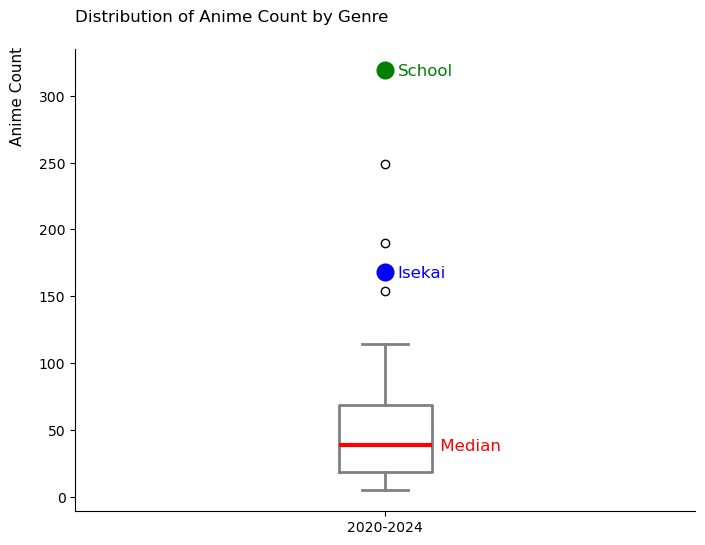

In [213]:
plt.figure(figsize=(8,6))
genre_count_5.plot(kind="box", medianprops=dict(color="red", linewidth=3), boxprops=dict(color="grey", linewidth=2), whiskerprops=dict(color="grey", linewidth=2), capprops=dict(color="grey", linewidth=2), whis=1.5, label=("2020-2024"))


isekai_value = genre_count_5.loc["Isekai"]
school_value = genre_count_5.loc["School"]
plt.plot(1, isekai_value, "o", color='blue', markersize=12)
plt.plot(1, school_value, "o", color='green', markersize=12)
plt.title("Distribution of Anime Count by Genre", loc="left", pad=20)
plt.ylabel("Anime Count", labelpad=10, y=0.9, fontsize=11)

plt.text(1.08, np.median(genre_count_5) - 4, " Median", color="red", fontsize=12)
plt.text(1.02, isekai_value - 4, "Isekai", color="blue", fontsize=12)
plt.text(1.02, school_value - 4, "School", color="green", fontsize=12)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

In [214]:
q3 = np.percentile(genre_count_5, 75)
q1 = np.percentile(genre_count_5, 25)
iqr = (q3 - q1)

isekai_distance_iqr = round((isekai_value - q3) / iqr, 2)
school_distance_iqr = round((school_value - q3) / iqr, 2)

print(f"Isekai falls {isekai_distance_iqr} IQR above Q3, while School falls {school_distance_iqr} IQR above Q3")

Isekai falls 2.01 IQR above Q3, while School falls 5.06 IQR above Q3


**Observation:**

Isekai being 2 IQR above the third quartile makes clear that it is one of the most popular sub-genres in the last five years, although I wouldn't be sure to call that an abnormal amount.

On the other hand, School being 5 IQR above the third quartile makes clear that it's not only one of the most famous sub-genres, but also the most important sub-genre in the analysed period.

### 9. Insights 
We have not only confirmed the insights from the previous notebook, but we have also quantified them. Isekai has experienced tremendous growth over the past 24 years and has become one of the most relevant sub-genres in the industry.

In the next notebook, we will explore *why* this happened.